# Kmeans Clustering

## Import Library

### Library yang digunakan

- **Pandas**\
    Untuk manipulasi dan membaca data dalam bentuk tabel. 

- **matplotlib**\
    Untuk membuat visualisasi data.

- **PySastrawi**\
    Untuk melakukan text processing.

- **scikit-learn**\
    Untuk menghitung TF dan TF-IDF.

- **WordCloud**\
    Untuk visualisasi kata yang paling sering muncul. 

In [1]:
# visualisasi data dan manipulasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')

# Pre-processing
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Melakukan setting jumlah kolom maksimal pada output
pd.options.display.max_columns = 10

## Membaca Data

Dataset yang digunakan : [link](https://github.com/egi-190137/topic-modelling-sklearn/blob/main/contents/dataset_pta.csv)

Dataset yang digunakan merupakan hasil dari crawling judul dan abstraksi jurnal yang telah ditambah nilai kolom bidang minat dan dihapus duplikasi data-nya.

In [3]:
df = pd.read_csv('detail.csv')
df.head()

,Judul,Abstraksi
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...
1,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...
2,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...
3,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...
4,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...


In [4]:
df.shape

(600, 2)

In [5]:
df = df.drop_duplicates()
df.head()

,Judul,Abstraksi
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...
3,Gerak Pekerja Pada Game Real Time Strategy Men...,Gerak pekerja ada pada game yang memiliki genr...
10,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...,Penyusunan Sistem Informasi Dinas Perindustria...
15,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...,Penggunaan teknologi mobile saat ini sangat ma...
20,RANCANG BANGUN APLIKASI INTRUSION PREVENTION S...,Dalam setiap perusahaan tentunya memiliki data...


In [6]:
df.shape

(120, 2)

Data yang digunakan dalam program ini hanya data pada kolom 'judul'. Untuk mengambil kolom 'judul' saja dapat dilakukan dengan inisialisasi ulang df dengan df[['judul']] 

In [7]:
df = df[['Judul']]
df.head()

,Judul
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...
3,Gerak Pekerja Pada Game Real Time Strategy Men...
10,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...
15,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...
20,RANCANG BANGUN APLIKASI INTRUSION PREVENTION S...


In [8]:
df.columns = ['judul']

## Pre-processing Data

Terdapat beberapa tahapan dalam melakukan Pre-processing data, diantaranya *case folding* (Mengubah teks menjadi *lower case*), menghapus angka dan tanda baca, menghapus white space dan *stopword removal*. Semua tahapan *pre-processing* tersebut saya masukkan ke dalam fungsi clean_text, kemudian saya aplikasikan pada data judul pada dataframe dengan method **.apply(clean_text)**. 

Untuk menghapus stopword saya menggunakan library **PySastrawi**, karena **PySastrawi** memiliki list stopword bahasa indonesia yang lebih lengkap daripada library **nltk**.

Pada Library **PySastrawi** penghapusan stopword dilakukan dengan membuata objek StopWordRemoverFactory, kemudian buat objek stopword remover dengan method create_stop_word_remover. Objek stopword remover memiliki method remove yang dapat digunakan untuk menghapus stopword dalam sebuah kalimat dengan memasukkan string ke dalam parameter method remove.  

In [9]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [10]:
def clean_text(text):
  # Mengubah teks menjadi lowercase
  cleaned_text = text.lower()
  # Menghapus angka
  cleaned_text = re.sub(r"\d+", "", cleaned_text)
  # Menghapus white space
  cleaned_text = cleaned_text.strip()
  # Menghapus tanda baca
  cleaned_text = cleaned_text.translate(str.maketrans("","",string.punctuation))
  # Hapus stopword
  cleaned_text = stopword.remove(cleaned_text)
  
  cleaned_text = stemmer.stem(cleaned_text)


  cleaned_text = cleaned_text.replace('\n', '')
  cleaned_text = cleaned_text.replace('\r', '')
  
  return cleaned_text
  

In [11]:
"\nss".replace('\n', "")

'ss'

In [12]:
# time taking
df['cleaned_judul'] = df['judul'].apply(clean_text)

### Perbedaan data awal dengan data yang telah di-preprocessing

In [13]:
df.head()

,judul,cleaned_judul
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,ancang implementasi sistem database distribusi...
3,Gerak Pekerja Pada Game Real Time Strategy Men...,gerak kerja game real time strategy finite sta...
10,PEMANFAATAN TOGAF ADM UNTUK PERANCANGAN SISTEM...,manfaat togaf adm ancang sistem informasi dina...
15,RANCANG BANGUN MANAJEMEN PEMBELAJARAN DAN TES ...,rancang bangun manajemen ajar tes toefl bas mo...
20,RANCANG BANGUN APLIKASI INTRUSION PREVENTION S...,rancang bangun aplikasi intrusion prevention s...


### Hapus kolom 'judul'

In [14]:
df.drop(['judul'],axis=1,inplace=True)

In [15]:
df.head()

,cleaned_judul
0,ancang implementasi sistem database distribusi...
3,gerak kerja game real time strategy finite sta...
10,manfaat togaf adm ancang sistem informasi dina...
15,rancang bangun manajemen ajar tes toefl bas mo...
20,rancang bangun aplikasi intrusion prevention s...


### Mengganti nama kolom __cleaned_judul__ dengan __judul__ 

In [16]:
df.columns = ['judul']

In [17]:
df.head()

,judul
0,ancang implementasi sistem database distribusi...
3,gerak kerja game real time strategy finite sta...
10,manfaat togaf adm ancang sistem informasi dina...
15,rancang bangun manajemen ajar tes toefl bas mo...
20,rancang bangun aplikasi intrusion prevention s...


### Contoh judul yang telah di lakukan *pre-processing*

In [18]:
df['judul'][0]

'ancang implementasi sistem database distribusi oracle studi siakad universitas trunojoyo'

## Ekstraksi fitur dan membuat Document Term Matrix (DTM)

Dalam perhitungan LSA (Latent Semantic Analysis) data yang diperlukan hanya TF-IDF. Sehingga pada program ini tidak perlu mencari nilai TF dari dokumen. Untuk mengetahui nilai TF-IDF dapat dilakukan dengan membuat objek dari kelas TfidfVectorizer yang disediakan library scikit-learn.

Rumus Term Frequency:

$$
tf(t,d) = { f_{ t,d } \over \sum_{t' \in d } f_{t,d}}
$$

$ f_{ t,d } \quad\quad\quad\quad$: Jumlah kata t muncul dalam dokumen

$ \sum_{t' \in d } f_{t,d} \quad\quad$: Jumlah seluruh kata yang ada dalam dokumen

Rumus Inverse Document Frequency:

$$
idf( t,D ) = log { N \over { | \{ d \in D:t \in d \} | } }
$$

$ N \quad\quad\quad\quad\quad$ : Jumlah seluruh dokumen

$ | \{ d \in D:t \in d \} | $ : Jumlah dokumen yang mengandung kata $ t $

Rumus TFIDF:

$$
tfidf( t,d,D ) = tf( t,d ) \times idf( t,D )
$$

In [19]:
vect = TfidfVectorizer()

Setelah objek **TfidfVectorizer** dibuat gunakan method **fit_transform** dengan argumen data yang akan dicari nilai **TF-IDF**-nya

In [20]:
vect_text = vect.fit_transform(df['judul'])

In [21]:
attr_count = vect.get_feature_names_out().shape[0]
print(f'Jumlah atribut dalam Document-Term Matrix : {attr_count}')

Jumlah atribut dalam Document-Term Matrix : 614


#### Menyimpan hasil tfidf ke dalam DataFrame

Hasil tfidf perlu diubah terlebih dahulu menjadi array agar dapat digunakan sebagai data. Kemudian untuk parameter kolom-nya dapat didapatkan menggunakan method get_feature_names_out pada objek TfidfVectorizer.

In [22]:
tfidf = pd.DataFrame(
    data=vect_text.toarray(),
    columns=vect.get_feature_names_out()
)
tfidf.head()

,abstrak,acute,addie,additive,additiveweighting,...,weight,weighting,windows,winnowing,xna
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


Mencari nilai **idf** dengan mengakses atribut **idf_** pada objek **tfidfVectorizer**. Atribut **idf_** hanya terdefinisi apabila parameter **use_idf** saat instansiasi objekk tfidfVectorizer bernilai **True**. Namun, **use_idf** sudah bernilai **True** secara default, sehingga kita dapat perlu menentukannya secara manual. 

In [24]:
train_size = tfidf.shape[0] * 0.8
X = tfidf.iloc[:int(train_size)]
Y = tfidf.iloc[int(train_size):]

In [25]:
idf = vect.idf_

In [26]:
dd= dict(zip(vect.get_feature_names_out(), idf))

l = sorted(dd, key = dd.get)

Kita dapat melihat kata yang paling sering dan paling jarang muncul pada judul tugas akhir berdasarkan nilai idf. Kata yang memiliki nilai lebih kecil, adalah kata yang paling sering muncul dalam judul

In [27]:
print("5 Kata paling sering muncul:")
for i, word in enumerate(l[:5]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling sering muncul:
1. metode	(Nilai idf: 1.9671491491076463)
2. sistem	(Nilai idf: 1.9891280558264213)
3. bas	(Nilai idf: 2.2404424841073274)
4. studi	(Nilai idf: 2.6602963296675917)
5. aplikasi	(Nilai idf: 2.7047480922384253)


In [28]:
print("5 Kata paling jarang muncul:")
for i, word in enumerate(l[:-5:-1]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling jarang muncul:
1. xna	(Nilai idf: 5.102643365036796)
2. windows	(Nilai idf: 5.102643365036796)
3. weight	(Nilai idf: 5.102643365036796)
4. wavelet	(Nilai idf: 5.102643365036796)


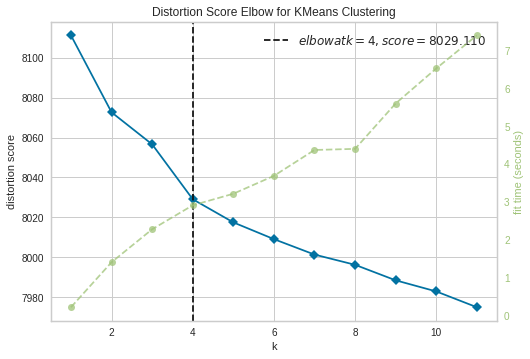

In [ ]:
"""First cluster using KMeans and run the elbow visualizer to find the best number of clusters"""
modelKm = KMeans(random_state=12)
visualizer = KElbowVisualizer(modelKm, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3)

In [31]:
kmeans = kmeans.fit(X)
kmeans_result = kmeans.predict(Y)

In [32]:
kmeans_result.get(5)

AttributeError: 'numpy.ndarray' object has no attribute 'get'